                                       Presented By -  Ranjan Das
                   Data Science and Business Analytics Intern at The Spark Foundation
                   
                               Task - 1: Pediction Using Supervised ML

### *** * * All The explanations have been provided in the form of comments and observations at each step. Please go through carefully.

## Importing Libraries

In [1]:
# importing most fundamental Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

## Importing our dataset for analysis

In [2]:
## url = "http://bit.ly/w-data"
dataset_url = "https://raw.githubusercontent.com/Ranjan-Das-cloud/TheSparksFoundation-task1/main/raw-data/student_scores.csv"
mydf = pd.read_csv(dataset_url)
print("Dataset has been imported successfully!!")

Dataset has been imported successfully!!


In [3]:
# displaying our dataset
mydf

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
mydf.sample(10)

,Hours,Scores
7,5.5,60
20,2.7,30
0,2.5,21
24,7.8,86
11,5.9,62
5,1.5,20
1,5.1,47
10,7.7,85
19,7.4,69
17,1.9,24


In [5]:
mydf.shape

(25, 2)

In [6]:
## checking the imformation about each columns of data of our dataset
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
mydf.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Observation - 1 :       Hence, there is no NaN or null data present in our dataset.

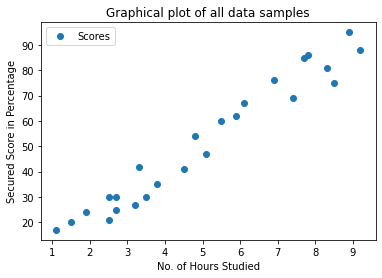

In [8]:
# Plotting the distribution of scores
mydf.plot(x='Hours', y='Scores', style='o')  
plt.title('Graphical plot of all data samples')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Secured Score in Percentage')  
plt.show()

##### Observation - 2: From the graph above, we can clearly assume that there is a linear relationship between the number of hours studied and percentage of score obtained. Hence, as per the problem statement, We may use Linear Regression algorithm.

## Exploratory Data Analysis (EDA) and Data Preprocessing

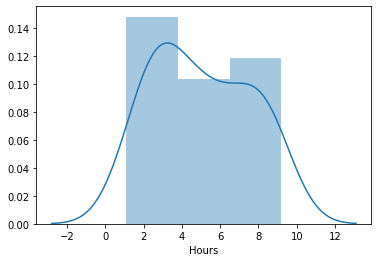

In [9]:
sb.distplot(mydf.Hours) 
plt.show()

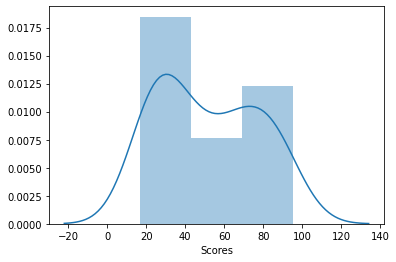

In [10]:
sb.distplot(mydf.Scores)
plt.show()

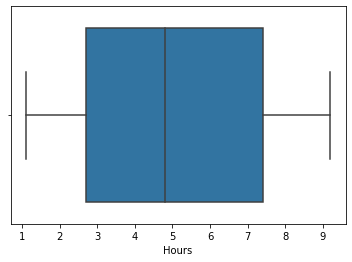

In [11]:
sb.boxplot(mydf.Hours)
plt.show()

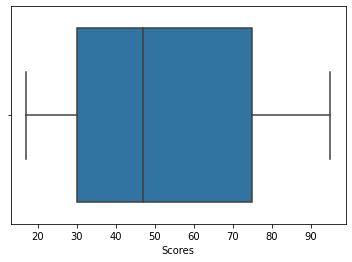

In [12]:
sb.boxplot(mydf.Scores)
plt.show()

##### Observation- 3: There is no such outlier present in our dataset to be removed and our data is uniformly and normally distributed as shown in distplot ( ) and we can consider now our dataset is good enough to perform training process.

#### Preparing the Data for training our model

In [13]:
X = mydf.iloc[:, :-1].values  
y = mydf.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the Model

###### We have split our data into training and testing sets, and now is finally the time to train our model with Linear Regression algorithm as we have two variables in our dataset, one is dependent and another is independent. 

In [15]:
from sklearn.linear_model import LinearRegression  
#regressor = LinearRegression()  
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [16]:
# finding the value of Coefficient
Coefficients = linear_reg.coef_
Coefficients[0]

9.910656480642238

In [17]:
# finding the value of Intercept
Intercept = linear_reg.intercept_
Intercept

2.018160041434669

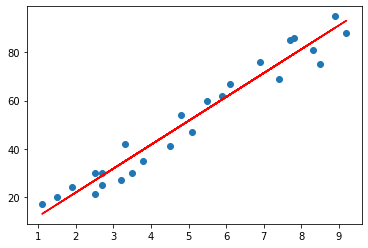

In [18]:
# Plotting the regression line along with data points
regression_line = Coefficients * X + Intercept

# Plotting for the entire data points
plt.scatter(X, y)
plt.plot(X, regression_line, color='red')
plt.show()

## Making the Predictions

In [19]:
print('X_test: \n\n', X_test) # Testing data - In Hours
y_pred = linear_reg.predict(X_test) # Predicting the scores
print('y_pred: \n\n', y_pred) # predicted data - In Hours

X_test: 

 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_pred: 

 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [20]:
# Comparing Actual value vs Predicted value
new_df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
new_df 

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating accuracy of the model

#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error and r2_score. There are many such metrics.

In [21]:
from sklearn.metrics import r2_score

In [22]:
# finding accuracy of our model
r2_score_initial = r2_score(y_test, y_pred)
print('R2 Score:', r2_score_initial)

R2 Score: 0.9454906892105355


## Tuning the Hyperparamer while training our model and Evaluating accuracy of the model 

#### Here, We are going to set the random_state as 18 which was 0 in previous case. We do so, as we can see the improvement of accuracy score for our model and also there is an mathematical explation behind this.

In [23]:
# changing random_state from 0 to 18 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=18) 

In [24]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


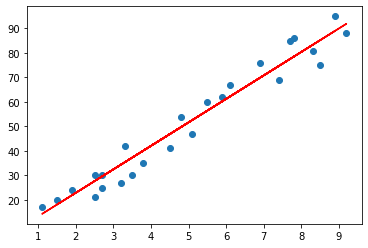

In [25]:
# Plotting the regression line along with data points
regression_line = linear_reg.coef_ * X + linear_reg.intercept_

# Plotting for the entire data points
plt.scatter(X, y)
plt.plot(X, regression_line, color='red')
plt.show()

In [26]:
# testing our model and making the predictions
y_pred = linear_reg.predict(X_test) # Predicting the scores
print('y_pred: \n\n', y_pred) # predicted data - In Hours

y_pred: 

 [27.65992039 27.65992039 91.92599448 29.57831066 89.04840907]


In [27]:
# Comparing Actual value vs Predicted value
new_df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
new_df

,Actual Scores,Predicted Scores
0,21,27.659920
1,30,27.659920
2,88,91.925994
3,25,29.578311
4,95,89.048409


In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report

In [29]:
# finding mean squared error
print('Mean Squared Error:', 
      mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 24.325261590981185


In [30]:
# calcultimg mean absolute eroor  
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691179214182799


In [31]:
# finding root mean squared error
print('Root Mean Squared Error:', 
      np.sqrt(mean_squared_error(y_test, y_pred))) 

Root Mean Squared Error: 4.932064637753766


In [32]:
# finding accuracy of our model
r2_score_optimized = r2_score(y_test, y_pred)
print('R2 Score:', r2_score_optimized)

R2 Score: 0.9771327540131409


In [33]:
## Printing the accuracy of our model for unknown prediction after and before Hyperparameter tuning
print('The percentage of accuracy of our model is : {:.4} %' .format(r2_score_optimized * 100))
print('\n\n Whereas, in the earlier stage, the percentage of accuracy of our model was : {:.4} %' .format(r2_score_initial * 100))

The percentage of accuracy of our model is : 97.71 %


 Whereas, in the earlier stage, the percentage of accuracy of our model was : 94.55 %


#### Saving our Model

In [34]:
import joblib
joblib.dump(linear_reg, 'Linear_Regressor.pkl')

['Linear_Regressor.pkl']

##### Sample Question for prediction: What will be predicted score if a student studies for 9.25 hrs/ day?

In [35]:
# Answer to the Sample Question
hours = 9.25
predict_score = linear_reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict_score[0]))

No of Hours = 9.25
Predicted Score = 92.40559204903423


# /////////////////////////////////////////// Thank You /////////////////////////////////////// 